# Build a Simple Workflow or Graph Using LangGraph

We will implement a simple workflow using the **LangGraph** framework. This workflow models a **morning routine** and demonstrates how **nodes**, **edges**, **state**, and **conditional logic** work together in a graph.

## 1️⃣ Understanding the Workflow

Our workflow looks like this:



[Start Morning] --> [Decision: Coffee or Jog] --> [Coffee or Jog Node] --> [End]


### Components:

- **Nodes:** Represent tasks (Python functions).  
- **Edges:** Define the flow between nodes.  
- **Conditional Edges:** Decide which path to take based on conditions.  
- **State:** Holds information that flows between nodes.  
- **State Graph:** Represents the structure of the entire graph.  


#### State
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [4]:
# Step 1: Define the State
from typing_extensions import TypedDict

class State(TypedDict):
    routine_info: str

TypeDict allows us to define a dictionary with specific keys and types, which helps in type-checking and structuring our state.

#### Nodes
Nodes are Python functions where the first argument is the state object.

In [5]:
# Step 2: Define Nodes
def start_morning(state: State):
    print("Start Morning Routine node has been called")
    return {"routine_info": state['routine_info'] + " Woke up"}

def coffee(state: State):
    print("Coffee node has been called")
    return {"routine_info": state['routine_info'] + " Drank Coffee"}

def jog(state: State):
    print("Jog node has been called")
    return {"routine_info": state['routine_info'] + " Went for Jog"}

In [9]:
# Step 3: Conditional Function
import random
from typing import Literal
def morning_choice(state:State)->Literal['coffee', 'jog']:
    if random.random()> 0.5:
        return "coffee"
    else:
        return "jog"


# Graph Construction with LangGraph

we build a graph workflow using the components defined earlier. The **StateGraph** class is the main graph class that we will use to create and manage the workflow.

---

## Steps for Graph Construction

1. **Initialize the Graph**  
   - We start by creating an instance of the `StateGraph` class.  
   - The `State` class, which we defined earlier, is passed as the schema to define the structure of the graph’s state.

2. **Add Nodes and Edges**  
   - Nodes are Python functions that perform specific tasks in the workflow.  
   - Edges connect the nodes and define the flow of execution.  
   - Conditional edges can be used to create branching logic, allowing different paths based on certain conditions.

3. **Special Nodes**  
   - **START Node**: A special node that acts as the entry point of the graph. It sends the initial input or state into the graph.  
   - **END Node**: A special node representing the termination of the workflow. When the execution reaches this node, the workflow ends.

4. **Compile the Graph**  
   - Compiling the graph performs basic checks to ensure there are no structural issues, such as unconnected nodes or invalid edges.  
   - This step ensures the workflow is ready for execution.

5. **Visualize the Graph**  
   - After the graph is constructed, it can be visualized as a **Mermaid diagram** to clearly see the workflow structure and flow between nodes.



In [7]:
pip install langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


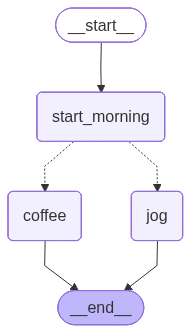

In [11]:

# Step 4: Build Graph
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

graph = StateGraph(State)

# Add nodes
graph.add_node("start_morning", start_morning)
graph.add_node("coffee", coffee)
graph.add_node("jog", jog)

# Schedule edges
graph.add_edge(START, "start_morning")
graph.add_conditional_edges("start_morning", morning_choice)
graph.add_edge("coffee", END)
graph.add_edge("jog", END)

# Compile and visualize
graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [12]:

# Step 5: Execute
graph_builder.invoke({"routine_info": "Morning routine begins."})

Start Morning Routine node has been called
Coffee node has been called


{'routine_info': 'Morning routine begins. Woke up Drank Coffee'}

### ✅ What Happens Here

start_morning → first node (records “Woke up”).

Conditional node → decides between coffee or jog.

Each node updates routine_info in the state.

Graph execution ends at END node.

You can visualize the workflow as a Mermaid diagram.

### GRAPH Invocation

In [13]:
graph_builder.invoke({"routine_info":"Hey My name is Nidhi"})

Start Morning Routine node has been called
Jog node has been called


{'routine_info': 'Hey My name is Nidhi Woke up Went for Jog'}